<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Build_Failures_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build Failures

Engineering teams at big tech companies often have systems in place that continuously test their latest code builds.

If all tests pass, the latest build is usually said to be green; if some tests fail, the latest build is typically said to be broken.

If a build is broken, it means that until someone fixes the underlying issue (a faulty test case or buggy code), any engineer working off of the latest code in the repository will be working on a broken build with failing tests.

Naturally, engineering teams care about how quickly broken builds get fixed, so they'll sometimes track how much time goes by with a broken build.

We'll call a "build run" a set of consecutive hours during which the latest build is green, then becomes broken, until it goes back to green; a build run will be represented by a list of booleans--specifically a list of `true`s followed by `false`s. For example, the build run `[true, true, true, false, false]` means that for three hours, the latest build was green, and then for two hours, it was broken. After those last two hours, the build got fixed, and a new build run was started.

One meaningful value that engineering teams sometimes care about is the "green percentage" of a build run: the percentage of time that a build run is green. For example, the green percentage of the example build run above is 60%, since the build was green for three hours out of the five consecutive hours of the build run.

Write a function that takes in a non-empty list of build runs and returns the greatest number of consecutive build runs with strictly decreasing green percentages. This will indicate the period of time when our engineers were increasingly the slowest to fix broken builds.

If there are no two consecutive build runs with strictly decreasing green percentages, your function should return `-1`.

Note that, by definition, each build run must start with at least one or more `true`s followed by at least one or more `false`s; `true`s and `false`s will never be alternating within a single build run.

In [ ]:
# Time = O(n log(m))
# Space = O(1)

# n = len(buildRuns)
# m = len(logest build_run)

def buildFailures(buildRuns):
  max_consecutive_build_run = 0
  current_run = 1
  previous_percentage = 0
  for build_run in buildRuns:
    current_percentage = get_percentage(build_run)
    if current_percentage < previous_percentage:
      current_run += 1
    else:
      current_run = 1
    previous_percentage = current_percentage
    max_consecutive_build_run = max(max_consecutive_build_run, current_run)

  return max_consecutive_build_run if max_consecutive_build_run >= 2 else -1

def get_percentage(build_run):
  left_idx = 0
  right_idx = len(build_run) - 1
  last_true_idx = None
  while left_idx <= right_idx:
    middle_idx = (left_idx + right_idx) // 2
    if build_run[middle_idx] == True and middle_idx + 1 <= len(build_run) - 1 and build_run[middle_idx + 1] == False:
      last_true_idx = middle_idx
      break
    elif build_run[middle_idx] == True:
      left_idx = middle_idx + 1
    else:
      right_idx = middle_idx - 1

  if last_true_idx == None:
    if build_run[middle_idx] == True:
      last_true_idx = len(build_run) - 1
    else:
      last_true_idx = 0

  return (last_true_idx + 1) / len(build_run)

In [ ]:
buildRuns = [
  [True, True, True, False, False],
  [True, True, True, True, False],
  [True, True, True, True, True, True, False, False, False],
  [True, False, False, False, False, False],
  [True, True, True, True, True, True, True, True, True, True, True, True, False],
  [True, False],
  [True, True, True, True, False, False]
]
buildFailures(buildRuns)

3

In [ ]:
buildRuns = [
  [True, True, True],
  [False, False]
]
buildFailures(buildRuns)

2

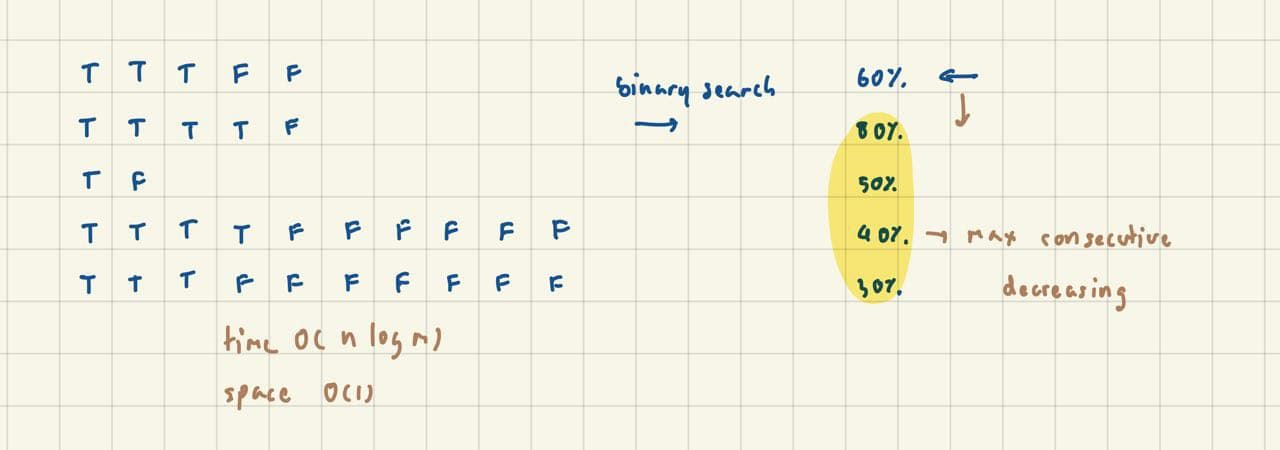